In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# 1번 예제

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 3.4861 - acc: 0.6799
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.7210 - acc: 0.7314
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.6506 - acc: 0.7677
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5550 - acc: 0.8091
Epoch 5/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5337 - acc: 0.8177
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.5021 - acc: 0.8277
Epoch 7/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4933 - acc: 0.8307
Epoch 8/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4899 - acc: 0.8336
Epoch 9/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4800 - acc: 0.8403
Epoch 10/10
60000/60000 [==============================] - 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

10000/10000 - 0s - loss: 0.5006 - acc: 0.8355

Test accuracy 0.8355


In [8]:
predictions = model.predict(test_images)

In [9]:
predictions[0]

array([1.1226974e-15, 6.6229415e-18, 0.0000000e+00, 9.5294032e-17,
       2.0359073e-37, 3.2376803e-02, 0.0000000e+00, 4.9477890e-02,
       4.4035115e-16, 9.1814530e-01], dtype=float32)

In [10]:
np.argmax(predictions[0])

9

# 2번 예제

In [13]:
!pip install tensorflow_hub==0.4.0

In [17]:
pip install tensorflow_datasets

  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\19\49\34\c3c1e78bcb954c49e5ec0d31784fe63d14d427f316b12fbde9
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\2c\f9\7f\6eb87e636072bf467e25348bbeb96849333e6a080dca78f706
Successfully built promise dill googleapis-common-protos
  Found existing installation: requests 2.11.1
    Uninstalling requests-2.11.1:
      Successfully uninstalled requests-2.11.1
Note: you may need to restart the kernel to use updated packages.


googlemaps 2.4.6 has requirement requests<=2.11.1, but you'll have requests 2.22.0 which is incompatible.


In [26]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

ImportError: cannot import name 'extract_zipped_paths' from 'requests.utils' (C:\Users\student\Anaconda3\lib\site-packages\requests\utils.py)

In [25]:
train_data, validation_data, test_data = tensorflow_datasets.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

NameError: name 'tensorflow_datasets' is not defined

In [24]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [20]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

NameError: name 'train_data' is not defined

In [0]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.330
accuracy: 0.859


# 3번 예제

In [27]:
!pip install -q seaborn

!pip install -q git+https://github.com/tensorflow/docs

In [28]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-rc1


In [29]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [30]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] ETA:  - ETA:  - 0s 5us/step


'C:\\Users\\student\\.keras\\datasets\\auto-mpg.data'

In [31]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [32]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [33]:
dataset = dataset.dropna()

In [34]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [35]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [36]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

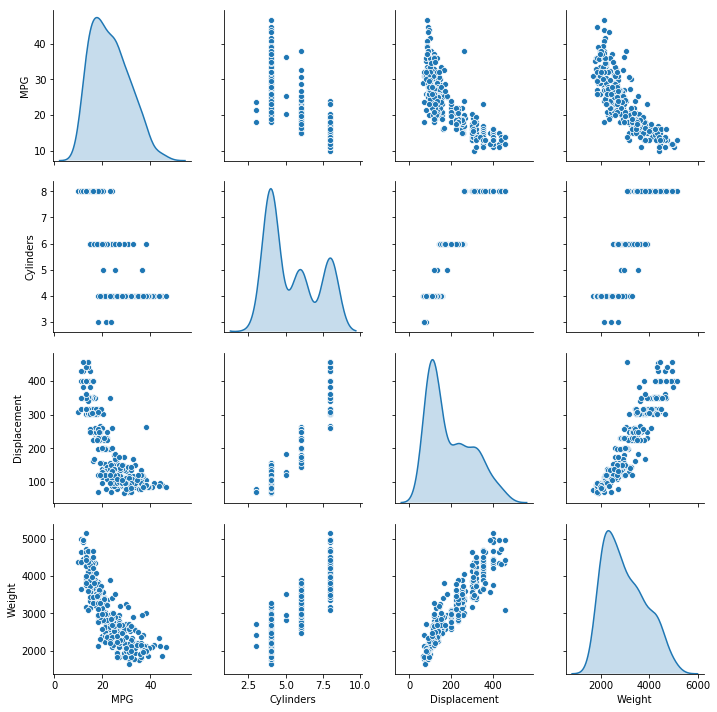

In [37]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [38]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [39]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [40]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [41]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [42]:
model = build_model()

In [43]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [44]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:575.4158,  mean_absolute_error:22.7741,  mean_squared_error:575.4158,  val_loss:563.4742,  val_mean_absolute_error:22.5112,  val_mean_squared_error:563.4741,  
....................................................................................................
Epoch: 100, loss:6.0286,  mean_absolute_error:1.7104,  mean_squared_error:6.0286,  val_loss:8.5323,  val_mean_absolute_error:2.2429,  val_mean_squared_error:8.5323,  
....................................................................................................
Epoch: 200, loss:5.3375,  mean_absolute_error:1.5859,  mean_squared_error:5.3375,  val_loss:8.3282,  val_mean_absolute_error:2.2085,  val_mean_squared_error:8.3282,  
....................................................................................................
Epoch: 300, loss:4.8477,  mean_absolute_error:1.4961,  mean_squared_error:4.8477,  val_loss:8.3639,  val_mean_absolute_error:2.1884,  val_mean_squared_error:8.3639,  
....................

In [45]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:568.3450,  mean_absolute_error:22.6382,  mean_squared_error:568.3450,  val_loss:555.1508,  val_mean_absolute_error:22.3449,  val_mean_squared_error:555.1509,  
.......................................................

# 4번 예제

In [46]:
!pip install -q sklearn

In [47]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [48]:
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [49]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [50]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [51]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [52]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

RuntimeError: __iter__() is only supported inside of tf.function or when eager execution is enabled.

In [53]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.836884, 'auc_precision_recall': 0.7877102, 'average_loss': 0.47236866, 'label/mean': 0.375, 'loss': 0.46374357, 'precision': 0.67346936, 'prediction/mean': 0.37898418, 'recall': 0.6666667, 'global_step': 200}


In [54]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

In [ ]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\student\\AppData\\Local\\Temp\\tmpr7mklxcp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014EFF998C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\student\\AppData\\Local\\Temp\\tmpr7mklxcp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014EFF998C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\student\AppData\Local\Temp\tmpr7mklxcp\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\student\AppData\Local\Temp\tmpr7mklxcp\model.ckpt.


INFO:tensorflow:loss = 0.6931472, step = 1


INFO:tensorflow:loss = 0.6931472, step = 1


INFO:tensorflow:global_step/sec: 256.985


INFO:tensorflow:global_step/sec: 256.985


INFO:tensorflow:loss = 0.6278604, step = 101 (0.391 sec)


INFO:tensorflow:loss = 0.6278604, step = 101 (0.391 sec)


INFO:tensorflow:Saving checkpoints for 200 into C:\Users\student\AppData\Local\Temp\tmpr7mklxcp\model.ckpt.


INFO:tensorflow:Saving checkpoints for 200 into C:\Users\student\AppData\Local\Temp\tmpr7mklxcp\model.ckpt.


INFO:tensorflow:Loss for final step: 0.59665525.


INFO:tensorflow:Loss for final step: 0.59665525.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-02-14T19:12:10Z


INFO:tensorflow:Starting evaluation at 2020-02-14T19:12:10Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\student\AppData\Local\Temp\tmpr7mklxcp\model.ckpt-200


INFO:tensorflow:Restoring parameters from C:\Users\student\AppData\Local\Temp\tmpr7mklxcp\model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.
